In [4]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm

## 1. Importando o dataset 

In [8]:
from sklearn import datasets

In [11]:
iris = datasets.load_iris()

In [12]:
#visualizando o  nome das features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
#visualizando o tipo de objeto
type(iris)

sklearn.utils.Bunch

In [14]:
#visualizando o nome das classes
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
#separando os dados de treino
treino=iris.data

In [17]:
#separando os dados de classe
classes=iris.target 

In [18]:
treino.shape#visualizando o array dos dados de treino

(150, 4)

In [19]:
#visualizando os dados de treino
treino[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [21]:
#visualizando o array de classes.
classes.shape

(150,)

In [22]:
#visualizando os dados unicos do array de classes
set(classes)

{0, 1, 2}

In [24]:
classes[:]#visualizando os dados de classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 2. Visualizando os dados

**Visualizando a disperção dos dados em relação a classe**

<IPython.core.display.Javascript object>


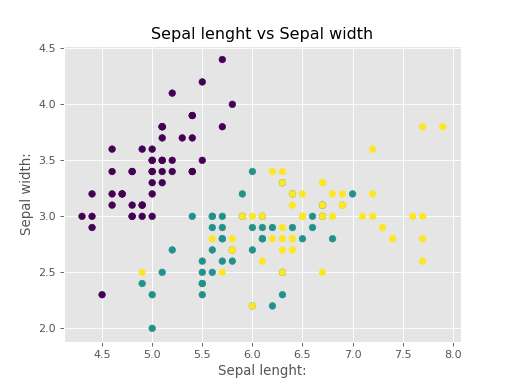

In [27]:
%matplotlib notebook
from matplotlib import style 
style.use('ggplot')
#sepal lenght vs sepal width
plt.xlabel('Sepal lenght:')
plt.ylabel('Sepal width:')
plt.title('Sepal lenght vs Sepal width')
plt.scatter(treino[:,0],treino[:,1],c=classes)

<IPython.core.display.Javascript object>


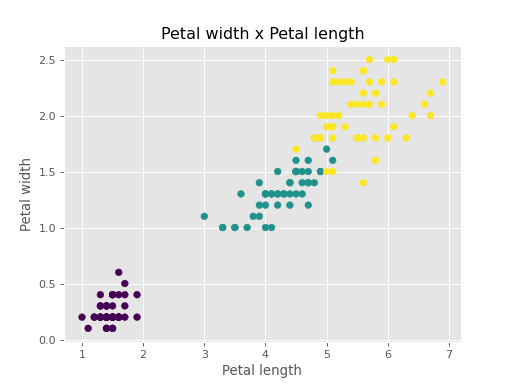

In [31]:
#plota o grafico de disperção dos dados com relação a classe
# dispersão dos dados de petal com as classes
%matplotlib notebook
from matplotlib import style 
style.use('ggplot')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal width x Petal length')
plt.scatter(treino[:,2],treino[:,3], c=classes)

## 3. Aplicando o SVM

In [33]:
len(treino[:-30]),len(classes[:-30])

(120, 120)

In [34]:
#visualizando os dados de treino
treino[:-30]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [35]:
classes[:-30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
#treinando o algoritimo de svm
# o objeto svm esta sendo usado na sua configuração padrão.
clf=svm.SVC().fit(treino[:-30],classes[:-30])

In [58]:
#chamando o objeto clf
clf

SVC()

In [41]:
#criando um array com os dados de teste 
#passando apenas 20% dos atributos que não foram testados.
teste=treino[-30:] 

In [42]:
teste

array([[6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [56]:
#fazendo a predição dos valores com  a porção dos dados de teste. 
clf.predict(teste)

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1])

In [44]:
#cria um array com as classes do dados de teste 
classes_teste=classes[-30:]


In [45]:
#visusalizando as classes de teste 
classes_teste

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

##  4. Visualizando o desempenho dos algoritimos

<IPython.core.display.Javascript object>


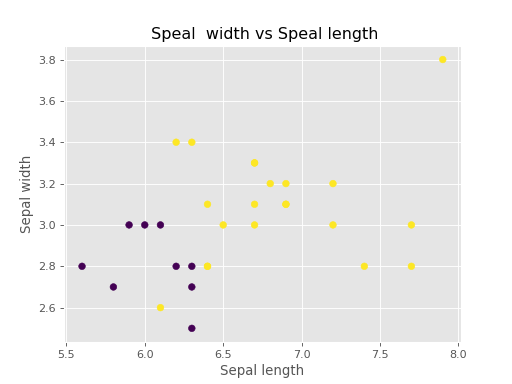

In [48]:
#Graficos de dispersão entre as colunas sepal length, sepal width e classe
# s pontos roxos são os pontos onde o classificador errou.
%matplotlib notebook
from matplotlib import style
style.use('ggplot')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(' Speal  width vs Speal length')
plt.scatter(treino[-30:,0],treino[-30:,1], c=clf.predict(teste))

<IPython.core.display.Javascript object>


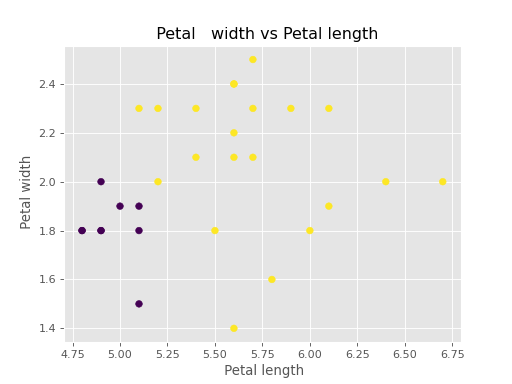

In [51]:
#Graficos de dispersão entre as colunas petal length, petal width e classe
# os pontos roxos são os pontos onde o classificador errou.
%matplotlib notebook
from matplotlib import style
style.use('ggplot')
plt.xlabel(' Petal length')
plt.ylabel(' Petal width')
plt.title('  Petal   width vs Petal length')
plt.scatter(treino[-30:,2],treino[-30:,3], c=clf.predict(teste)) #usou as ultimas 30l

<IPython.core.display.Javascript object>


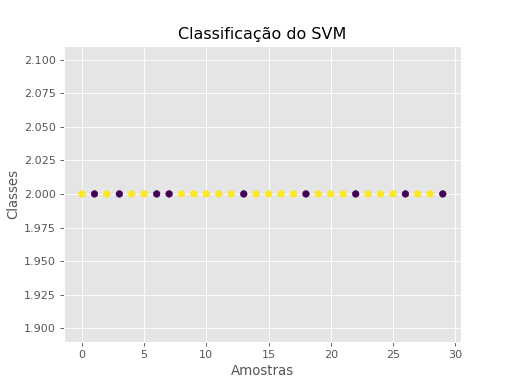

In [52]:
#Graficos de dispersão entre as colunas Petal length, petal width e classe
# Os pontos roxos são os pontos onde o classificador errou.
#mostrando os 30 pontos ao longo do tempo.

%matplotlib notebook
from matplotlib import style
style.use('ggplot')
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classificação do SVM')
plt.scatter(range(len(classes_teste)),classes_teste,c=clf.predict(teste)) #usou as ultimas 30l

### Matriz de confusão

In [60]:
print(pd.crosstab(classes_teste,clf.predict(teste),rownames=['Real'],colnames=['Predito'],margins=True),'')

Predito  1   2  All
Real               
2        9  21   30
All      9  21   30 


### Cross Validation

In [61]:
#função que retorna a acuracia após fazer um cross validaiton.
def Acuracia(clf,x,y):
    resultados=cross_val_predict(clf,x,y,cv=5)
    valor_classes=[0,1,2]
    return metrics.accuracy_score(y,resultados)

In [62]:
Acuracia(clf,treino,classes) #chamando a função

0.9666666666666667

Utilizando a função de validaçção cruzada observou-se uma acertividade geral do model em torno de 96%.

### Metricas de avaliação

In [63]:
resultados=cross_val_predict(clf,treino,classes,cv=5)
valor_classes=[0,1,2]
print(metrics.classification_report(classes,resultados,valor_classes))

C:\Users\marco\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.96      0.95        50
           2       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



Segundo o desepenho do  modelo, foi mostrado que: 
   * O modelo teve uma precisão de 100% para acertar a classe 0
   * 94% para acertar a classe 1.
   * 96% para acertar a classe 2.